In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)  # Use raw string r"\s+"


# Convert to DataFrame
X = pd.DataFrame(raw_df)


# Display 
X


,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


<Axes: xlabel='6', ylabel='7'>

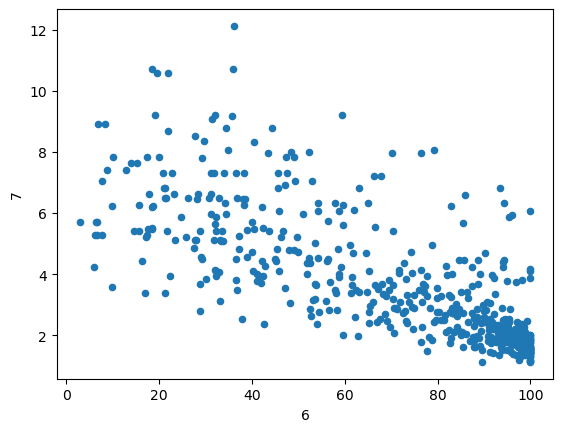

In [3]:
X.plot(kind='scatter', x = 6, y = 7)
# Column 6 and 7, from 0

In [4]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1012.000000,1012.000000,1012.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,180.143778,12.008350,16.834792,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,188.132839,17.250728,9.912616,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.257830,0.000000,8.375000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,24.021000,7.240000,18.100000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,391.435000,16.780000,21.890000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,396.900000,100.000000,50.000000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


In [5]:
# Column 6 std is 28.1488，while Column 7 std is 2.1，this difference can have negative effects on the numberical computation of singular value decomposition.
# So the first thing we want to do is shift this data cloud to the origin and normalize it so that all of the standard deviations are one.

In [6]:
# Step 1: Normalize the data
# subtract the mean from the data cloud to shift it to the origin. And we're going to divide it by the standard devision in order for the normalized data to have unit standard deviation.
# So let's define a variable (mu) for the mean
mu = X.mean()
sigma = X.std()
Xnorm = (X-mu)/sigma
Xnorm

,0,1,2,3,4,5,6,7,8,9,10
0,-0.957501,0.347327,-1.465284,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558
1,1.152145,-0.407423,0.722837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.957390,-0.696107,-0.985087,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794
3,1.152145,-0.166274,0.480722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.957390,-0.696107,-0.985087,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794
...,...,...,...,...,...,...,...,...,...,...,...
1007,1.152145,-0.369164,0.712749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,-0.956952,-0.696107,-0.494803,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303
1009,1.133806,-0.320471,0.521074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,-0.957283,-0.696107,-0.494803,-0.272329,0.157968,-0.362408,0.434302,-0.612640,-0.981871,-0.802418,1.175303


<Axes: xlabel='6', ylabel='7'>

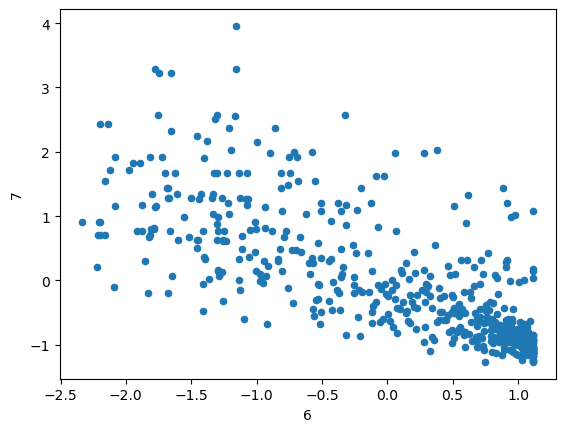

In [7]:
Xnorm.plot(kind='scatter', x = 6, y = 7)

In [8]:
Xnorm.describe()
# Standard deviation (std) is approximately 1, which indicates the data has been normalized.

,0,1,2,3,4,5,6,7,8,9,10
count,1.012000e+03,1.012000e+03,1.012000e+03,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,506.000000,5.060000e+02
mean,3.861645e-17,-1.018070e-16,3.949410e-16,-9.127525e-17,-1.123388e-16,-1.018070e-16,2.808469e-16,-1.123388e-16,0.000000,0.000000,-3.089316e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00
min,-9.575014e-01,-6.961068e-01,-1.651914e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-0.981871,-1.312691,-2.704703e+00
25%,-9.561645e-01,-6.961068e-01,-8.534370e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-0.637331,-0.766817,-4.875567e-01
50%,-8.298539e-01,-2.764144e-01,1.276361e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-0.522484,-0.464213,2.745872e-01
75%,1.123096e+00,2.766057e-01,5.099772e-01,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603,1.529413,8.057784e-01
max,1.152145e+00,5.100750e+00,3.345757e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603,1.796416,1.637208e+00


In [9]:
# step 2: perform SVD on the normalized data

In [10]:
from scipy.linalg import svd

In [11]:
Xnorm = Xnorm.dropna()  # Remove rows with NaN values
svd(Xnorm) # array must not contain infs or NaNs

(array([[-0.03383338,  0.04989731, -0.0084658 , ..., -0.04484492,
         -0.04402261, -0.04270171],
        [-0.02141134,  0.058671  , -0.03959008, ..., -0.0266921 ,
         -0.0263239 , -0.02350084],
        [-0.02990384,  0.05872993, -0.02767635, ..., -0.0128008 ,
         -0.0111233 , -0.00349378],
        ...,
        [ 0.00476335,  0.0577064 , -0.03202577, ...,  0.97726994,
         -0.02139739, -0.01663969],
        [ 0.0045495 ,  0.05543914, -0.0365149 , ..., -0.02139663,
          0.97972735, -0.01622868],
        [ 0.00614406,  0.04879811, -0.0533949 , ..., -0.01660677,
         -0.01622045,  0.98429732]]),
 array([50.83532023, 26.65595275, 25.46112133, 24.15980908, 20.65600035,
        19.28341103, 14.2255896 , 10.68984138,  9.51379096,  7.7472003 ,
         5.19384998]),
 array([[ 0.04398993, -0.4518789 ,  0.27790025,  0.01939947,  0.37396783,
         -0.19156552,  0.35331204, -0.37250631,  0.32531538,  0.34397436,
          0.22798543],
        [-0.3003148 , -0.5621919 

In [12]:
U, s, Vt = svd(Xnorm,full_matrices = False)  # performs Singular Value Decomposition (SVD) on Xnorm, a normalized matrix, using SciPy's svd() function.
U, s, Vt

(array([[-0.03383338,  0.04989731, -0.0084658 , ..., -0.00634255,
         -0.01930581,  0.07883381],
        [-0.02141134,  0.058671  , -0.03959008, ..., -0.00127759,
          0.01423857, -0.01682204],
        [-0.02990384,  0.05872993, -0.02767635, ...,  0.02521679,
          0.02376459, -0.01394092],
        ...,
        [ 0.00476335,  0.0577064 , -0.03202577, ...,  0.03071147,
          0.00670447,  0.00673235],
        [ 0.0045495 ,  0.05543914, -0.0365149 , ...,  0.03315191,
          0.0051939 ,  0.00562443],
        [ 0.00614406,  0.04879811, -0.0533949 , ...,  0.02095184,
         -0.00758322,  0.00539079]]),
 array([50.83532023, 26.65595275, 25.46112133, 24.15980908, 20.65600035,
        19.28341103, 14.2255896 , 10.68984138,  9.51379096,  7.7472003 ,
         5.19384998]),
 array([[ 0.04398993, -0.4518789 ,  0.27790025,  0.01939947,  0.37396783,
         -0.19156552,  0.35331204, -0.37250631,  0.32531538,  0.34397436,
          0.22798543],
        [-0.3003148 , -0.5621919 

In [13]:
U, s, Vt = svd(Xnorm,full_matrices = False) 
Sigma = np.diag(s)
V = Vt.T

In [14]:
# We can check the decomposition.
U @ Sigma @ V.T

array([[-0.9575014 ,  0.34732738, -1.46528353, ..., -0.98187119,
        -0.66594918, -1.45755797],
       [-0.95738983, -0.69610683, -0.98508737, ..., -0.86702449,
        -0.98635338, -0.3027945 ],
       [-0.95738994, -0.69610683, -0.98508737, ..., -0.86702449,
        -0.98635338, -0.3027945 ],
       ...,
       [-0.95721203, -0.69610683, -0.49480305, ..., -0.98187119,
        -0.80241764,  1.17530274],
       [-0.95695248, -0.69610683, -0.49480305, ..., -0.98187119,
        -0.80241764,  1.17530274],
       [-0.95728299, -0.69610683, -0.49480305, ..., -0.98187119,
        -0.80241764,  1.17530274]])

In [15]:
Xnorm

,0,1,2,3,4,5,6,7,8,9,10
0,-0.957501,0.347327,-1.465284,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558
2,-0.957390,-0.696107,-0.985087,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794
4,-0.957390,-0.696107,-0.985087,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794
6,-0.957363,-0.696107,-1.478398,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920
8,-0.957168,-0.696107,-1.478398,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920
...,...,...,...,...,...,...,...,...,...,...,...
1002,-0.957202,-0.696107,-0.494803,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303
1004,-0.957294,-0.696107,-0.494803,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303
1006,-0.957212,-0.696107,-0.494803,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303
1008,-0.956952,-0.696107,-0.494803,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303


In [16]:
np.allclose(Xnorm, U @ Sigma @ V.T)  # Check whether the results of Xnorm and U @ Sigma @ V.T are the same.

True

In [17]:
# We can recover the original dataset from the decomposition
mu + sigma* pd.DataFrame(U @ Sigma @ V.T)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,1.800000e+01,2.31,-2.081668e-16,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,2.664535e-14,7.07,2.636780e-16,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,1.065814e-14,7.07,4.440892e-16,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,3.730349e-14,2.18,9.714451e-17,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,3.019807e-14,2.18,3.053113e-16,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,5.329071e-15,11.93,4.024558e-16,0.573,6.593,69.1,2.4786,1.0,273.0,21.0
502,0.04527,7.105427e-15,11.93,4.718448e-16,0.573,6.120,76.7,2.2875,1.0,273.0,21.0
503,0.06076,-1.776357e-15,11.93,4.579670e-16,0.573,6.976,91.0,2.1675,1.0,273.0,21.0
504,0.10959,5.329071e-15,11.93,4.163336e-16,0.573,6.794,89.3,2.3889,1.0,273.0,21.0


In [18]:
np.allclose(X, mu + sigma* pd.DataFrame(U @ Sigma @ V.T))

ValueError: operands could not be broadcast together with shapes (1012,11) (506,11) 

In [19]:
assert X.shape == (U @ Sigma @ V.T).shape

AssertionError: 

In [18]:
# project the data to 4 dimensions
r = 4
Ur = U[:,:r]
Sigmar = Sigma[:r,:r]

Xrr = pd.DataFrame (Ur @ Sigmar)
Xrr

,0,1,2,3
0,-1.719931,1.330060,-0.215549,0.878240
1,-1.088452,1.563931,-1.008008,-0.015301
2,-1.520171,1.565502,-0.704671,0.252753
3,-1.936222,1.338662,-1.315273,0.169886
4,-1.871405,1.412692,-1.202678,0.261882
...,...,...,...,...
501,0.016657,1.313451,-1.127712,-0.069509
502,0.274812,1.311157,-1.317573,-0.239300
503,0.242146,1.538219,-0.815412,0.180652
504,0.231275,1.477783,-0.929710,0.087920


In [19]:
# incorporate new data
newhome = [0.044, 70, 2.24, 0.0, 0.4, 6.87, 47.4, 7.82, 5.0, 358, 14.8]
newhome_norm = (newhome - mu) / sigma
newhome_proj = newhome_norm @ V[:, :r]
newhome_proj 

array([-4.26974091, -1.12063395,  0.18661117,  1.82433333])

In [20]:
# add to the existing table
Xrr.loc[len(Xrr)] = newhome_proj
Xrr
# add one row

,0,1,2,3
0,-1.719931,1.330060,-0.215549,0.878240
1,-1.088452,1.563931,-1.008008,-0.015301
2,-1.520171,1.565502,-0.704671,0.252753
3,-1.936222,1.338662,-1.315273,0.169886
4,-1.871405,1.412692,-1.202678,0.261882
...,...,...,...,...
502,0.274812,1.311157,-1.317573,-0.239300
503,0.242146,1.538219,-0.815412,0.180652
504,0.231275,1.477783,-0.929710,0.087920
505,0.312335,1.300760,-1.359494,-0.272795


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster  # Import the cluster module from the scikit-learn (sklearn) library. This module is used to implement various clustering algorithms such as KMeans, DBSCAN, and MeanShift.
np.random.seed(1234)  # Set the random seed for NumPy, where 1234 is the seed value. 
# The purpose of setting a random seed is to ensure the reproducibility of random numbers, meaning that each time the code is run, the randomly generated data remains the same.

In [22]:
def myscatter(data,assignment):
    sns.scatterplot (data = data, x = 'Annual Income (k$)',y = 'Spending Score (1-100)',
                     hue = assignment,
                     palette = sns.color_palette('Set1', as_cmap = True))
# This piece of code defines a myscatter function, which is used to plot a scatter plot with different color categories.

In [23]:
# Load the data

In [24]:
data = pd.read_csv(r'C:\Users\liliz\OneDrive\Desktop\AI and ML\Berkeley Certificate\Module 6\video_assets_starter\DataSets\Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
data = data.set_index('CustomerID')

In [26]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [27]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

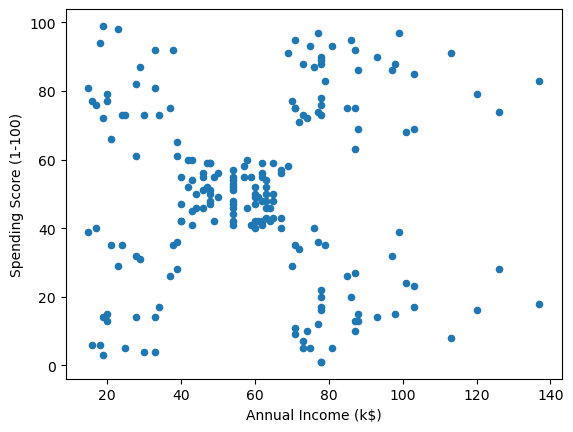

In [28]:
X.plot(kind='scatter', x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

In [29]:
# K-means

In [30]:
kmeans = cluster.KMeans(n_clusters = 5, init = 'random')  
# Create a KMeans clustering model with 5 clusters specified.
# random means it selects the initial centroids at random from the dataset. 

In [31]:
kmeans.fit(X)
# Train (fit) the KMeans model using the dataset X

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=5)

In [32]:
kmeans.labels_
# The attribute returns the label or cluster ID for each data point. Each data point is assigned an integer between 0 and 4, representing its corresponding cluster.

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

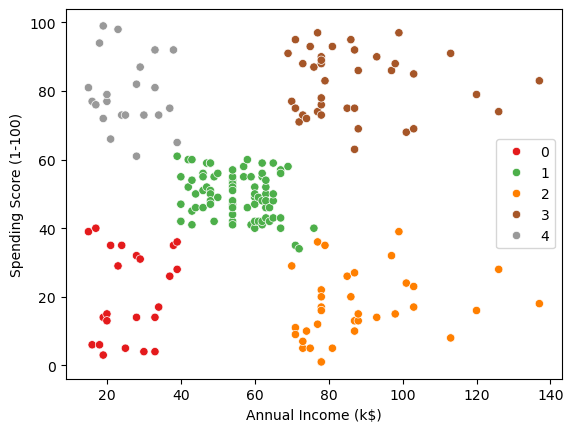

In [33]:
myscatter(X, kmeans.labels_)

In [34]:
# Improved initialization:kmeans++

In [35]:
kmeanspp = cluster.KMeans(n_clusters = 5, init = 'k-means++', n_init=10, verbose=1).fit(X)

# k-means++ K-means++ tries to distribute these more intelligently throughout the dataset. 
# So it picks the first centroid at random, and then subsequent centroids are chosen such that they are far away from centroids that have already been chosen. 
# And in this way it avoids clustering initial centroids, which could lead to numerical problems. 
# In fact, k-means++ works a lot better than random initialization.

Initialization complete
Iteration 0, inertia 60021.0.
Iteration 1, inertia 44759.151051913264.
Iteration 2, inertia 44472.33192121094.
Iteration 3, inertia 44448.45544793371.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 66800.0.
Iteration 1, inertia 44539.959977970524.
Iteration 2, inertia 44454.47647967974.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 96203.0.
Iteration 1, inertia 75365.03391234842.
Iteration 2, inertia 71082.29895802318.
Iteration 3, inertia 67793.55914556423.
Iteration 4, inertia 66835.62643491471.
Iteration 5, inertia 66733.43857149452.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 98597.0.
Iteration 1, inertia 78397.67140986196.
Iteration 2, inertia 75598.46375250429.
Iteration 3, inertia 75063.16296655753.
Iteration 4, inertia 75036.4854455889.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, in

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
import sklearn
print(sklearn.__version__)

1.5.1


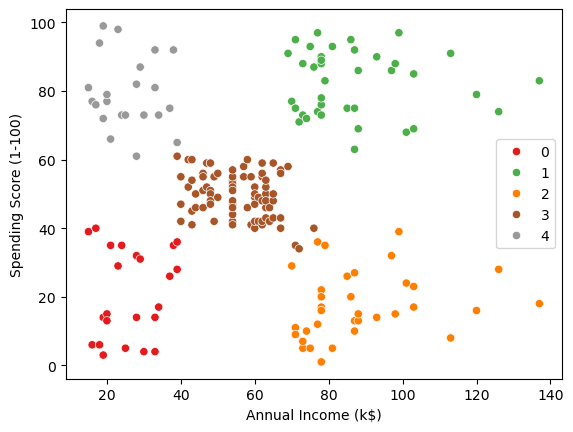

In [37]:
myscatter(X,kmeanspp.labels_)

In [38]:
# DBSCAN  
# Density-Based Spatial Clustering of Applications with Noise
# K-means is not the best. DBSCAN does a lot better. 

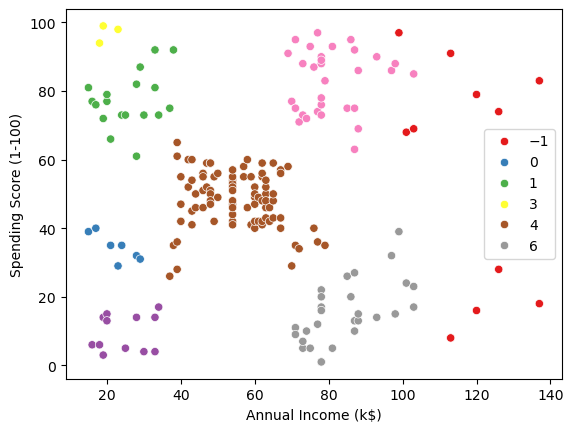

In [39]:
dbscan = cluster.DBSCAN(eps = 9, min_samples = 3).fit(X)
myscatter(data, dbscan.labels_)

# red are outliers

In [40]:
# Prediction

In [41]:
# we have two new customers. income 30, spend 20; income 80, spend 20
Xnew = np.array([[30,20],[80,20]])

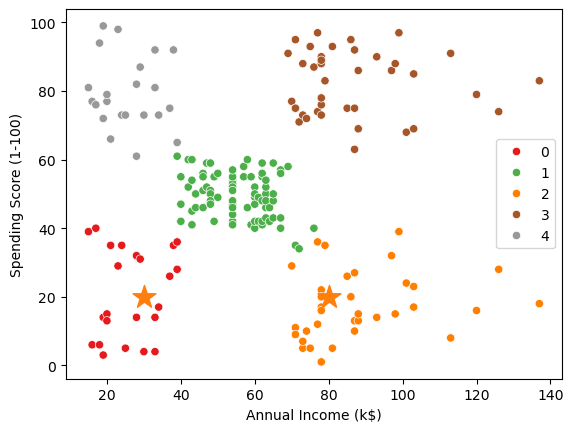

In [42]:
myscatter(data, kmeans.labels_)
plt.scatter(Xnew[:,0],Xnew[:,1],marker = '*', s=300)

In [43]:
# K-means can predict or assign a class to a new customer with the predict method.
kmeans.predict(Xnew)
# it shows one customer should be in the '0' cluster, and the other customer should be in the '2' cluster.
# only kmeans can do prediction, DBSCAN cannot.

C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 2])